## 25. Deep Learning and Neural Networks Notes

In [ ]:
#TF Syntax Basics - Part One Preparing the Data

In [ ]:
#Keras is the official API for TensorFlow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')

In [7]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


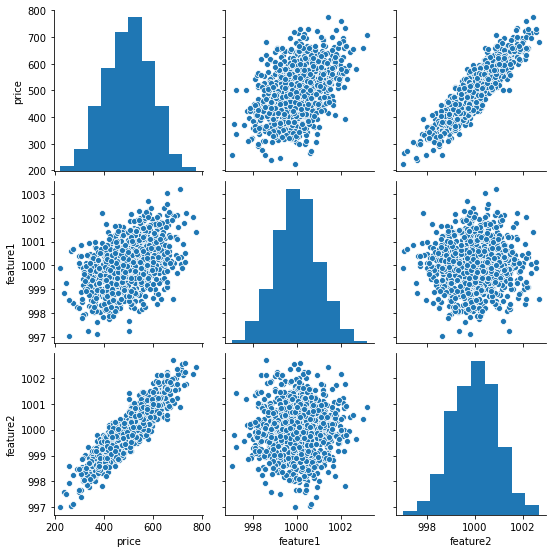

In [8]:
sns.pairplot(data=df)

In [9]:
#main work flow for keras and TF
#TF takes numpy arrays not dataframes

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['feature1', 'feature2']].values

In [12]:
y = df['price'].values

In [17]:
X.shape

(1000, 2)

In [14]:
y.shape

(1000,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape

(700, 2)

In [21]:
X_test.shape

(300, 2)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
#normalize and scale your data

In [24]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perfor

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(X_train) #calculates std, min, max
#only train/fit on the training data! 

MinMaxScaler()

In [27]:
X_train = scaler.transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [33]:
print('X_test min: ', X_test.min())
print('X_train min: ', X_train.min())
print('X_test max: ', X_test.max())
print('X_train max: ', X_train.max())

X_test min:  -0.014108392024496652
X_train min:  0.0
X_test max:  1.0186515935232023
X_train max:  1.0


In [34]:
X_train.mean()

0.5036347891643072

In [ ]:
#TF Syntax Basics - Part Two   Creating and Training the Model

In [35]:
from tensorflow.keras.models import Sequential

In [36]:
from tensorflow.keras.layers import Dense

In [38]:
#help(Dense)

In [39]:
#there are two ways to call a keras based model

In [ ]:
#first method
model = Sequential([Dense(4, activation='relu'), 
                   Dense(2, activation='relu'),
                   Dense(1)]) #Just your regular densely-connected NN layer
#Units = neurons
#activation = activation function. String call

In [45]:
#second method  - this method is easier to edit the layers
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

#output layer - looking to predict a price
model.add(Dense(1))

#compile your model and choose optimizer and loss function. Go to notebook for suggestions about which 
#optimizer and loss function to choose for various situations. 
model.compile(optimizer='rmsprop', loss='mse')

In [46]:
model.fit(x=X_train, y=y_train, epochs=250, verbose=1) #blurb in notebook about what epochs mean. But basically it is how many
# times your model will iterate through the entire dataset. 

Epoch 1/250
22/22 [==============================] - 0s 2ms/step - loss: 256471.2188
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256296.7031
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256110.4531
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255897.8281
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 255647.9375
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255355.3594
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255015.8125
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 254625.0938
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254173.3281
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 253662.6250
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 253085.3750
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 2ms/step - loss: 743.2490
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 716.6661
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 693.9524
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 668.9752
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 646.4520
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 622.1078
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 597.5087
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 575.6657
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 552.1514
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 530.1080
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 510.0631
Epoch 108/250
22/22 [==============================] - 0s 2ms/step - loss: 488.5994
Epoch 10

22/22 [==============================] - 0s 2ms/step - loss: 24.0931
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2806
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5806
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5507
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5324
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4997
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3076
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 24.8706
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5152
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2842
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4645
Epoch 206/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4651
Epoch 207/250
22/2

In [47]:
loss_df = pd.DataFrame(model.history.history)

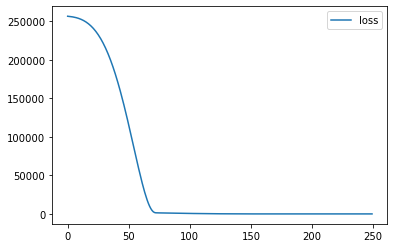

In [48]:
loss_df.plot()

In [ ]:
#TF Syntax Basics - Part Three Model Evaluation

In [49]:
model.evaluate(X_test,y_test, verbose=0) #returns the loss function you entered into the model. In this case its MSE

26.076974868774414

In [50]:
model.evaluate(X_train, y_train, verbose=0)

24.10588264465332

In [51]:
test_pred = model.predict(X_test)

In [52]:
test_pred.shape

(300, 1)

In [55]:
test_pred = pd.Series(test_pred.reshape(300,))


AttributeError: 'Series' object has no attribute 'reshape'

In [56]:
test_pred.shape

(300,)

In [57]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [58]:
pred_df = pd.concat([pred_df, test_pred], axis=1)

In [60]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [61]:
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,406.011932
1,624.156198,624.730835
2,582.455066,593.259033
3,578.588606,573.298889
4,371.224104,367.239960


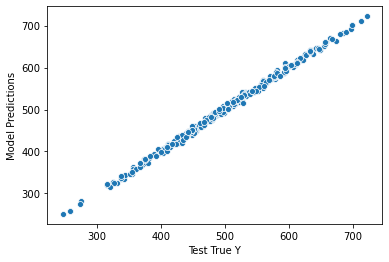

In [64]:
sns.scatterplot(data=pred_df, x='Test True Y', y='Model Predictions')

In [66]:
#you can now just use regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.130468546192075

In [68]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

26.076979344851257

In [69]:
df.describe() 
#MAE is about 4.13 which is less that 1% of the mean price. So it is a good predictor. 

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [70]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5  #RMSE

5.10656238039361

In [71]:
#the way you evaluate brand new data is essentially the same as what you do with the test set. 
new_gem = [[998, 1000]]

In [72]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [73]:
new_gem = scaler.transform(new_gem)

In [74]:
model.predict(new_gem)

array([[420.42517]], dtype=float32)

In [75]:
#Save your model! 

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model.save('my_gem_model.h5')

In [78]:
later_model = load_model('my_gem_model.h5')

In [79]:
later_model.predict(new_gem)

array([[420.42517]], dtype=float32)